In [84]:
import nltk
import os

# Download necessary NLTK data to the venv
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/domasbelickas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
corpus = '''
Hello welcome, to this amazing nlp tutorial. 
please to watch the whole course! to become expert in NLP.
it's an amazing course
'''

In [7]:
print(corpus)


Hello welcome, to this amazing nlp tutorial. 
please to watch the whole course! to become expert in NLP.
it's an amazing course



In [9]:
# we need to convert the cropus to different sentences
from nltk.tokenize import sent_tokenize

documents = sent_tokenize(corpus)
# important to note that this returns a list
documents

['\nHello welcome, to this amazing nlp tutorial.',
 'please to watch the whole course!',
 'to become expert in NLP.',
 "it's an amazing course"]

In [88]:
# now we will move to converting paragraphs to words
from nltk.tokenize import word_tokenize

word_tokenize(corpus)

['Hello',
 'welcome',
 ',',
 'to',
 'this',
 'amazing',
 'nlp',
 'tutorial',
 '.',
 'please',
 'to',
 'watch',
 'the',
 'whole',
 'course',
 '!',
 'to',
 'become',
 'expert',
 'in',
 'NLP',
 '.',
 'it',
 "'s",
 'an',
 'amazing',
 'course']

In [89]:
# also this can be applied for sentences

for sentence in documents:
    print(word_tokenize(sentence))

['Hello', 'welcome', ',', 'to', 'this', 'amazing', 'nlp', 'tutorial', '.']
['please', 'to', 'watch', 'the', 'whole', 'course', '!']
['to', 'become', 'expert', 'in', 'NLP', '.']
['it', "'s", 'an', 'amazing', 'course']


In [90]:
# this split to words can be acheived using wordpunct, that deals with 's differently
from nltk import wordpunct_tokenize

wordpunct_tokenize(corpus)

['Hello',
 'welcome',
 ',',
 'to',
 'this',
 'amazing',
 'nlp',
 'tutorial',
 '.',
 'please',
 'to',
 'watch',
 'the',
 'whole',
 'course',
 '!',
 'to',
 'become',
 'expert',
 'in',
 'NLP',
 '.',
 'it',
 "'",
 's',
 'an',
 'amazing',
 'course']

In [91]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

tokenizer.tokenize(corpus)
# this deals with dots differently, leaving them inside of the last word list element

['Hello',
 'welcome',
 ',',
 'to',
 'this',
 'amazing',
 'nlp',
 'tutorial.',
 'please',
 'to',
 'watch',
 'the',
 'whole',
 'course',
 '!',
 'to',
 'become',
 'expert',
 'in',
 'NLP.',
 'it',
 "'s",
 'an',
 'amazing',
 'course']

# Stemming

In [92]:
words = ['eating', 'eats', 'eaten', 'writing', 'writes', 'programming', 'programs', 'history', 'finally', 'finalized']

In [93]:
# porter stemmer
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

for word in words:
    print(word, stemming.stem(word))

eating eat
eats eat
eaten eaten
writing write
writes write
programming program
programs program
history histori
finally final
finalized final


In [94]:
# when stemming applied the form of the word can change, as in this example history

stemming.stem('congratulations')

'congratul'

In [95]:
# another useful stemming technique is regexpstemming
# it allows us using standart regexp expressions describe from we want to stem the word

from nltk.stem import RegexpStemmer

reg_stemming = RegexpStemmer('ing$|s$|e$|able$', min=4)

reg_stemming.stem('minimizing')

'minimiz'

In [96]:
# snowball stemmer is also a used technique
# 

from nltk.stem import SnowballStemmer

snow_stemming = SnowballStemmer('english')

for word in words:
    print(word, snow_stemming.stem(word))

eating eat
eats eat
eaten eaten
writing write
writes write
programming program
programs program
history histori
finally final
finalized final


In [97]:
# comparing snowball and porter

print('porter stemming gives out', stemming.stem('fairly'), stemming.stem('sportingly'))

print('snowball gives out:', snow_stemming.stem('fairly'), snow_stemming.stem('sportingly'))

porter stemming gives out fairli sportingli
snowball gives out: fair sport


- Based on one example we cant really say, which one is better, but it seems that snowball is supreme compared to porter.
- But if we want to apply it to replicate some research results or just want to have more conservative results printed out, then we would turn to stemming in porter.
- Overall snowball stemming is way better than potter, since it has better performance (both time wise and result wise) and it can deal with larger number of different languages


In [98]:
print('porter stemming gives out', stemming.stem('does'))

print('snowball gives out:', snow_stemming.stem('does'))

porter stemming gives out doe
snowball gives out: doe


# Lemmatization

As we can see stemming is still fairly limited, thus it implies that better techniques are existing and one of them is lemmatization.

This technique is fairly similar to stemming, the difference is that root of the word is gien as the output rather than the root of stem.

The output is a meaningful word rather than a root, in example goes -> go, eat -> eat...

In [99]:
# lemmatizer 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('eating')

'eating'

In [100]:
# as we can see we got the output as eating, since the other argument 'pos' that is present in lemmatize means noun
# so in order for python to understand better and complete this task in the correct way we need to give the correct word type before

lemmatizer.lemmatize('eating', pos='v')
# verb - v
# noun - n
# adjective - a 
# adverb - r

'eat'

In [105]:
for word in words:
    print(word, '-->', lemmatizer.lemmatize(word, pos='v'))

eating --> eat
eats --> eat
eaten --> eat
writing --> write
writes --> write
programming --> program
programs --> program
history --> history
finally --> finally
finalized --> finalize


keep in mind that this is using a super big corpa, for this task, so it can be super heavy and can be slow

# Stopwords

In [106]:
## Speech Of DR APJ Abdul Kalam to have a larger corpus

paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [108]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/domasbelickas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

- it is important to look over this list of stopwords, since if we are doing some text classification for bad/good, we should leave some of them, so these stopwords list can be adjusted accordingly to tasks.

In [125]:
# removing stopwords from the corpus and then apply stemming
stemmer = PorterStemmer() # this was used as the initial version, but it is performing poorly, so we replaced it 
snow_stemming = SnowballStemmer('english')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

sentences = nltk.sent_tokenize(paragraph)
type(sentences)

for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in set(stopwords.words('english'))]
    sentences[i] = ' '.join(words) # this is converting all of the sentence words back into a sentence 

# important to note that lemmatizer doesnt convert word to lower, but this can be adjusted manually

In [126]:
sentences

['i three vision india .',
 'in 3000 year history , people world come invaded u , captured land , conquered mind .',
 'from alexander onwards , greek , turk , mogul , portuguese , british , french , dutch , came looted u , took .',
 'yet done nation .',
 'we conquered anyone .',
 'we grabbed land , culture , history tried enforce way life .',
 'why ?',
 'because respect freedom others.that first vision freedom .',
 'i believe india got first vision 1857 , started war independence .',
 'it freedom must protect nurture build .',
 'if free , one respect u .',
 'my second vision india ’ development .',
 'for fifty year developing nation .',
 'it time see developed nation .',
 'we among top 5 nation world term gdp .',
 'we 10 percent growth rate area .',
 'our poverty level falling .',
 'our achievement globally recognised today .',
 'yet lack self-confidence see developed nation , self-reliant self-assured .',
 'isn ’ incorrect ?',
 'i third vision .',
 'india must stand world .',
 'becaus

# Part of speech tags

- CC = coordinating conjunction 
- CD = cardinal digit 
- DT = determiner 
- EX = existential there (like: “there is” … think of it like “there exists”) 
- FW = foreign word 
- IN = preposition/subordinating conjunction 
- JJ = adjective – ‘big’ 
- JJR = adjective, comparative – ‘bigger’ 
- JJS = adjective, superlative – ‘biggest’ 
- LS = list marker 1
- MD = modal – could, will 
- NN = noun, singular ‘- desk’ 
- NNS = noun plural – ‘desks’ 
- NNP = proper noun, singular – ‘Harrison’ 
- NNPS = proper noun, plural – ‘Americans’ 
- PDT = predeterminer – ‘all the kids’ 
- POS = possessive ending parent’s 
- PRP = personal pronoun –  I, he, she 
- PRP$ = possessive pronoun – my, his, hers 
- RB = adverb – very, silently, 
- RBR = adverb, comparative – better 
- RBS = adverb, superlative – best 
- RP = particle – give up 
- TO = to go ‘to’ the store. 
- UH = interjection – errrrrrrrm 
- VB = verb, base form – take 
- VBD = verb, past tense – took 
- VBG = verb, gerund/present participle – taking 
- VBN = verb, past participle – taken 
- VBP =verb, sing. present, non-3d – take 
- VBZ = verb, 3rd person sing. present – takes 
- WDT = wh-determiner – which 
- WP = wh-pronoun – who, what 
- WP$ = possessive wh-pronoun, eg- whose 
- WRB = wh-adverb, eg- where, when

In [127]:
paragraph

'I have three visions for India. In 3000 years of our history, people from all over \n               the world have come and invaded us, captured our lands, conquered our minds. \n               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours. \n               Yet we have not done this to any other nation. We have not conquered anyone. \n               We have not grabbed their land, their culture, \n               their history and tried to enforce our way of life on them. \n               Why? Because we respect the freedom of others.That is why my \n               first vision is that of freedom. I believe that India got its first vision of \n               this in 1857, when we started the War of Independence. It is this freedom that\n               we must protect and nurture and build on. If we are not free, no one will respect us.\n              

In [130]:
# we will find out the post tag
nltk.download('averaged_perceptron_tagger_eng')

sentences = nltk.sent_tokenize(paragraph)

for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [word for word in words if word not in set(stopwords.words('english'))]
    pos_tag = nltk.pos_tag(words)
    print(pos_tag)

[('I', 'PRP'), ('three', 'CD'), ('visions', 'NNS'), ('India', 'NNP'), ('.', '.')]
[('In', 'IN'), ('3000', 'CD'), ('years', 'NNS'), ('history', 'NN'), (',', ','), ('people', 'NNS'), ('world', 'NN'), ('come', 'VBP'), ('invaded', 'VBN'), ('us', 'PRP'), (',', ','), ('captured', 'VBD'), ('lands', 'NNS'), (',', ','), ('conquered', 'VBD'), ('minds', 'NNS'), ('.', '.')]
[('From', 'IN'), ('Alexander', 'NNP'), ('onwards', 'NNS'), (',', ','), ('Greeks', 'NNP'), (',', ','), ('Turks', 'NNP'), (',', ','), ('Moguls', 'NNP'), (',', ','), ('Portuguese', 'NNP'), (',', ','), ('British', 'NNP'), (',', ','), ('French', 'NNP'), (',', ','), ('Dutch', 'NNP'), (',', ','), ('came', 'VBD'), ('looted', 'JJ'), ('us', 'PRP'), (',', ','), ('took', 'VBD'), ('.', '.')]
[('Yet', 'RB'), ('done', 'VBN'), ('nation', 'NN'), ('.', '.')]
[('We', 'PRP'), ('conquered', 'VBD'), ('anyone', 'NN'), ('.', '.')]
[('We', 'PRP'), ('grabbed', 'VBD'), ('land', 'NN'), (',', ','), ('culture', 'NN'), (',', ','), ('history', 'NN'), ('tried'

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/domasbelickas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [134]:
nltk.pos_tag('Taj Mahal is beautiful Monument'.split())
# for pos tag we need to provide list of words 

[('Taj', 'NNP'),
 ('Mahal', 'NNP'),
 ('is', 'VBZ'),
 ('beautiful', 'JJ'),
 ('Monument', 'NN')]

# Named entity recognition

In [2]:
sentence = "The Eiffel Tower was built from 1887 to 1889 by French engineer Gustave Eiffel, whose company specialized in building metal frameworks and structures."

# the expected result with named entity recog
"""
Person Eg: Krish C Naik
Place Or Location Eg: India
Date Eg: September,24-09-1989
Time  Eg: 4:30pm
Money Eg: 1 million dollar
Organization Eg: iNeuron Private Limited
Percent Eg: 20%, twenty percent
"""

'\nPerson Eg: Krish C Naik\nPlace Or Location Eg: India\nDate Eg: September,24-09-1989\nTime  Eg: 4:30pm\nMoney Eg: 1 million dollar\nOrganization Eg: iNeuron Private Limited\nPercent Eg: 20%, twenty percent\n'

In [3]:
import nltk 
import svgling
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

words = nltk.word_tokenize(sentence)

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/domasbelickas/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/domasbelickas/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
tag_elements = nltk.pos_tag(words)

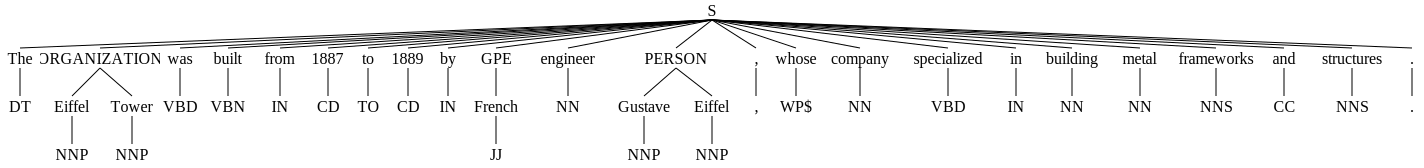

In [5]:
nltk.ne_chunk(tag_elements)